# Since I already have pyforest installed in my environment; I am not importing basic libraries

In [449]:
# Read the dataset of Housing
df=pd.read_excel('1553768847_housing.xlsx')

<IPython.core.display.Javascript object>

In [450]:
# See the dataset to review the data
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [451]:
# Lets check the shape of the data i.e. Rows and Columns
df.shape

(20640, 10)

In [452]:
# Lets check if the dataset has any missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [453]:
# We can see the column 'total_bedrooms' has 207 missing values. Lets fill the missing values with mean value of the column 
df['total_bedrooms'].mean()

537.8705525375618

In [454]:
df['total_bedrooms'].fillna('538',inplace=True)

In [455]:
# Lets check if the missing values are now covered for the dataset
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [456]:
# Lets check the data types of our dataset
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms         object
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [457]:
# We can see column 'total_bedrooms' is an object along with 'ocean_proximity'. Lets convert 'total_bedrooms' into int64
df['total_bedrooms']=df['total_bedrooms'].astype(np.int64)

<IPython.core.display.Javascript object>

In [458]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [459]:
# The 'ocean_proximity' column has categorical values. Lets change it into numerical values
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [460]:
df['ocean_proximity_num']=pd.factorize(df['ocean_proximity'])[0]
df.tail()

<IPython.core.display.Javascript object>

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_num
20635,-121.09,39.48,25,1665,374,845,330,1.5603,INLAND,78100,2
20636,-121.21,39.49,18,697,150,356,114,2.5568,INLAND,77100,2
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,INLAND,92300,2
20638,-121.32,39.43,18,1860,409,741,349,1.8672,INLAND,84700,2
20639,-121.24,39.37,16,2785,616,1387,530,2.3886,INLAND,89400,2


In [461]:
df['ocean_proximity_num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [462]:
# lets move the column 'ocean_proximity_numeric' from last column to second last column
col=df.pop('ocean_proximity_num')
df.insert(len(df.columns)-1,'ocean_proximity_num',col)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,ocean_proximity_num,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,0,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,0,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,0,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,0,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,0,342200


In [463]:
# Lets drop the categorical value column 'ocean_proximity' so that we may use the dataset for LinearRegression model
df=df.drop(['ocean_proximity'],axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_num,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,0,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,0,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,0,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,0,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,0,342200


# Lets create the predictors/feature data and the target/response data from the dataset for LinearRegression model

In [464]:
# Extract input (X) and output (y) data from the dataset to train and test the data
X=df.iloc[:, :-1]
y=df.iloc[:,-1]

In [465]:
# Import train_test_split from sklearn to split the dataset into training and test data
from sklearn.model_selection import train_test_split

In [466]:
# Split the data into 80% train and 20% test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [467]:
# Import LinearRegression model, RMSE and Math to perform the prediction and evaluate the errors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

In [468]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [469]:
predictions=lm.predict(X_test)
print(sqrt(mean_squared_error(y_test,predictions)))
print("Coefficient of determination:")
print(r2_score(y_test,predictions)*100)

71068.94871100849
Coefficient of determination:
61.45634260177177


# The above RMSE value is based on the Linear Regression model; which reveals the performance of the model. To judge the RMSE, We need to compare it with the target variable. If the RMSE is close to the range of target variable then the model is performing well. Also, the R2_Score is 61% which is quite less for the model to be selected for prediction.

In [470]:
# Lets Import Decision Tree Regression model to train and test the data and validate it to check the RMSE
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

In [471]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [472]:
regressor_predict=regressor.predict(X_test)

In [473]:
print(sqrt(mean_squared_error(y_test,regressor_predict)))
print("Coefficient of determination:")
print(r2_score(y_test,regressor_predict)*100)

69432.22086417647
Coefficient of determination:
63.21123119437646


# The above RMSE value is based on the DecisionTreeRegressor model; which reveals the performance of the model. Since, the RMSE value is decreased as compare to the LinearRegression model; Lets do the random forest regression on the splitted data

In [474]:
# Lets import Random Forest Regression model to train and test the data
from sklearn.ensemble import RandomForestRegressor
randomregressor = RandomForestRegressor(n_estimators=100,random_state=42)
randomregressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [475]:
random_predict=randomregressor.predict(X_test)

In [476]:
print(sqrt(mean_squared_error(y_test,random_predict)))
print("Coefficient of determination:")
print(r2_score(y_test,random_predict)*100)

50574.64240788608
Coefficient of determination:
80.48094528382165


# The above RMSE value is based on the RandomForestRegression model; which is further decreased as compared to the Linear and Decision Tree models. Also, the R2_score is 80% which is better than both the models. Hence we should use Random Forest Regression model for the prediction of the housing prices

In [477]:
# Now Lets perform LinearRegression with only one independent variable i.e. median_income from X_train and X_test
# Lets standardize the training and test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_standard=scaler.transform(X_train)
X_test_standard=scaler.transform(X_test)

In [478]:
X_train_col=X_train_standard[:,7]
X_test_col=X_test_standard[:,7]

In [479]:
# Since, the independent variable from X_train and X_test are 1D array, we need to convert it to 2D array
X_train_col=X_train_col.reshape(-1,1)
X_test_col=X_test_col.reshape(-1,1)

In [480]:
# Lets fit the LinearRegression model on the new training and test data for median_income and the median_house_value
lm1=LinearRegression()
lm1.fit(X_train_col,y_train)

LinearRegression()

In [481]:
prediction1=lm1.predict(X_test_col)

In [482]:
prediction2=lm1.predict(X_train_col)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

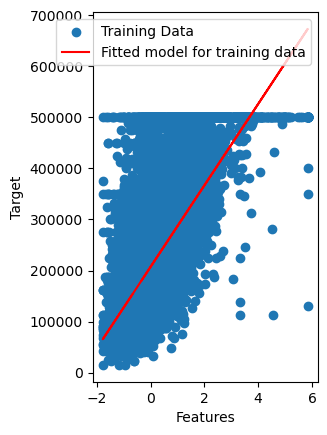

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

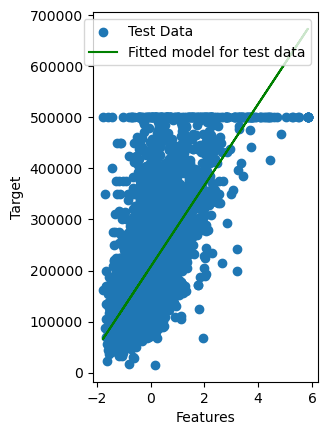

In [483]:
# Lets plot the fitted model for training data as well as test data to check if fitted model satisfies the test data
# Plot the training data
plt.subplot(1,2,1)
plt.scatter(X_train_col,y_train,label='Training Data')
plt.plot(X_train_col,prediction2,color='red',label='Fitted model for training data')
plt.legend()
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

# Plot the test data
plt.subplot(1,2,2)
plt.scatter(X_test_col,y_test,label='Test Data')
plt.plot(X_test_col,prediction1,color='green',label='Fitted model for test data')
plt.legend()
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

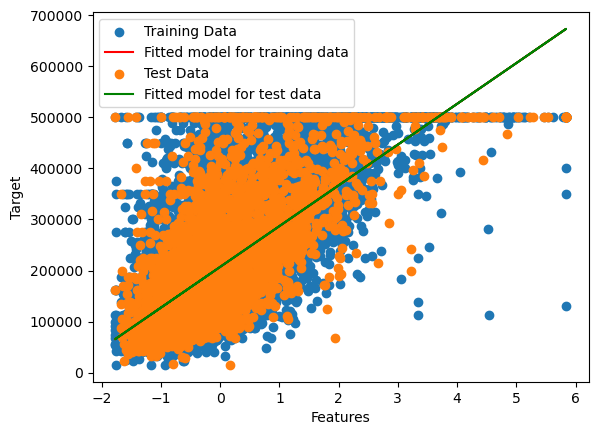

In [484]:
# Combined Plot of Training and Test data to check if the fitted model satisfies the test data

plt.scatter(X_train_col,y_train,label='Training Data')
plt.plot(X_train_col,prediction2,color='red',label='Fitted model for training data')
plt.scatter(X_test_col,y_test,label='Test Data')
plt.plot(X_test_col,prediction1,color='green',label='Fitted model for test data')
plt.legend()
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()